In [29]:
import os
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV
from itertools import product, permutations
import warnings
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()  # for plot styling

In [119]:
# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import  BisectingKMeans

In [4]:
# Utilities
from sklearn.metrics import accuracy_score, classification_report
from sklearn.exceptions import ConvergenceWarning

In [5]:
def pre_process(data):
    df = pd.DataFrame(data)
    df['clase'] = pd.to_numeric(df['clase'])
    # print(df.info())
    return df

In [6]:
def split_data(data, target_name='clase',test_split=0.2, random_state=731012):
    X = data.drop(target_name, axis=1)
    y = data[target_name]

    return train_test_split(X, y, test_size = test_split, random_state = random_state)
    

In [125]:
data_location = './data'

data_ext = '.arff'

datasets = 0
dataset_files = 0

models = [
    {"Name":"LogisticRegression", "Type":"Supervised","Model":LogisticRegression()},
    {"Name":"RandomForestClassifier", "Type":"Supervised", "Model":RandomForestClassifier()},
    {"Name":"SVM", "Type":"Supervised", "Model":SVC(kernel='rbf',C=1.0, gamma='scale')},
    {"Name":"DecisionTreeClassifier", "Type":"Supervised", "Model":DecisionTreeClassifier()},
    {"Name":"KMeans", "Type":"Unsupervised", "Model":KMeans(max_iter=500,tol=0.01,random_state=731012)},    
    {"Name":"BisectingKMeans", "Type":"Unsupervised", "Model":BisectingKMeans()},    
]

model_search_space = {}
model_search_space2 = {}

model_search_space['LogisticRegression'] = [
    {"max_iter":125},
    {"max_iter":100},
    {"max_iter":150},
    {"max_iter":200},
    {"max_iter":250},
]

# 'penalty': ['l1', 'l2','elasticnet'],

model_search_space2['LogisticRegression'] = {    
    'C' : np.logspace(-4, 4, 20).tolist(),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 200, 300, 400]
    }

model_search_space2['RandomForestClassifier'] = {
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9] 
    }

model_search_space2['SVM'] = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf']
} 

model_search_space2['DecisionTreeClassifier'] = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_search_space2['KMeans'] = {
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [0.0001, 0.001, 0.01],
    'algorithm': ['auto', 'full', 'elkan'],
    # 'random_state': [0, 42, 100]
}


model_search_space2['BisectingKMeans'] = {
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [0.0001, 0.001, 0.01],
    'algorithm': ['lloyd', 'elkan'],
    # 'random_state': [0, 42, 100]
}


model_search_space2['DBScan'] = {
    'eps': np.linspace(0.01,1,num=20).tolist()
}




model_result = {}


for m in models:
    model_result[m['Name']] = []


model_search_parameters = {}

print("Models with search space:")
for m in model_search_space2:
    print(m)
    param_values = product(*[v if isinstance(v, (list, tuple)) else [v] for v in model_search_space2[m].values()])
    model_search_parameters[m] = [dict(zip(model_search_space2[m].keys(), values)) for values in param_values]
    
# print(os.listdir(data_location))

Models with search space:
LogisticRegression
RandomForestClassifier
SVM
DecisionTreeClassifier
KMeans
BisectingKMeans
DBScan


In [114]:
# Print out search parameters for hyper tuning
print(model_search_parameters)

{'LogisticRegression': [{'C': 0.0001, 'solver': 'lbfgs', 'max_iter': 100}, {'C': 0.0001, 'solver': 'lbfgs', 'max_iter': 200}, {'C': 0.0001, 'solver': 'lbfgs', 'max_iter': 300}, {'C': 0.0001, 'solver': 'lbfgs', 'max_iter': 400}, {'C': 0.0001, 'solver': 'newton-cg', 'max_iter': 100}, {'C': 0.0001, 'solver': 'newton-cg', 'max_iter': 200}, {'C': 0.0001, 'solver': 'newton-cg', 'max_iter': 300}, {'C': 0.0001, 'solver': 'newton-cg', 'max_iter': 400}, {'C': 0.0001, 'solver': 'liblinear', 'max_iter': 100}, {'C': 0.0001, 'solver': 'liblinear', 'max_iter': 200}, {'C': 0.0001, 'solver': 'liblinear', 'max_iter': 300}, {'C': 0.0001, 'solver': 'liblinear', 'max_iter': 400}, {'C': 0.0001, 'solver': 'sag', 'max_iter': 100}, {'C': 0.0001, 'solver': 'sag', 'max_iter': 200}, {'C': 0.0001, 'solver': 'sag', 'max_iter': 300}, {'C': 0.0001, 'solver': 'sag', 'max_iter': 400}, {'C': 0.0001, 'solver': 'saga', 'max_iter': 100}, {'C': 0.0001, 'solver': 'saga', 'max_iter': 200}, {'C': 0.0001, 'solver': 'saga', 'max

In [115]:
# Ignore ConvergenceWarning during tuning of hyperparameters
warnings.filterwarnings("ignore", category = ConvergenceWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [131]:

for dataset_i, filename in enumerate(os.listdir(data_location)):
    # if dataset_i == 5:
    #     break;
    file_path = os.path.join(data_location, filename)
    if os.path.isdir(file_path):
        datasets += 1
        data_files = os.listdir(file_path)
        for data_file in os.listdir(file_path):
            if data_ext in data_file:

                # # Scenario: No separate test and train files exist for dataset
                # if "_test" not in data_files and "_train" not in data_files:
                # # if not "test" in data_file:
                dataset_files += 1
                # print(data_file)
                # if "abalone" in data_file:
                data, meta = arff.loadarff(file_path + "/" + data_file)
                print("Dataset",dataset_i,filename)
                # print(meta)
                d = pre_process(data)


                classes = set(d['clase'])
                nr_of_classes = len(classes) 
                # print(nr_of_classes)
                # print(classes)

                
                if "_train" in data_file:
                    print("Found designated training data file")
                    X_train = d.drop("clase", axis=1)
                    y_train = d["clase"]

                if "_test" in data_file:
                    print("Found designated test data file")
                    X_test = d.drop("clase", axis=1)
                    y_test = d["clase"]

                if "_train" not in data_file and "_test" not in data_file:
                    X_train, X_test, y_train, y_test = split_data(d)                

        X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 731012)
        
        
        for model in models:
            # print(model['Name'])
            # if "BisectingKMeans" in model['Name']:
                print(model['Name'])
                # Check if the model has hyperparameters available to check
                if model['Name'] in model_search_parameters:
                    # print(model['Name'])
    
                    # param_grid = out # model_search_space2[model['Name']]
    
                    param_grid = model_search_parameters[model['Name']]
                    
                    # current_model = clone(model['Model'])
                    
                    # clf = GridSearchCV(current_model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
    
                    # best_clf = clf.fit(X_train, y_train)
    
                    
                    best_model = None
                    best_accuracy = 0
                    best_model_params = None
                    for search_param in param_grid:
                        # print(search_param)
                        current_model = clone(model['Model'])
                        
                        if model['Name'] == 'KMeans' or model['Name'] == 'BisectingKMeans':
                            # print('clusters:',nr_of_classes)
                            current_model.set_params(n_clusters=nr_of_classes, **search_param)
                            output = current_model.fit_predict(X_train)
                        else:
                            current_model.set_params(**search_param)
                        # print(current_model.get_params())
                            output = current_model.fit(X_train, y_train)

                        
                        if model['Name'] == 'KMeans' or model['Name'] == 'BisectingKMeans':
                            labels = np.zeros_like(output)
                            cluster_map = {}
                            for i in range(nr_of_classes):
                                mask = (output == i)
                                labels[mask] = mode(y_train[mask])[0]
                                cluster_map[i] = mode(y_train[mask])[0][0]
                        
                        if model['Name'] == 'DBScan':
                            y_valid_pred = current_model.predict(X_valid)
                        else:    
                            y_valid_pred = current_model.predict(X_valid)

                        if model['Name'] == 'KMeans' or model['Name'] == 'BisectingKMeans':
                            valid_labels = np.zeros_like(y_valid_pred)

                            for i in range(nr_of_classes):
                                mask = (y_valid_pred == i)
                                y_valid_pred[mask] = cluster_map[i]
                            # print(test_labels)
    
                            # print("test accuracy:",accuracy_score(y_test, test_labels))
                        
                        valid_accuracy = accuracy_score(y_valid, y_valid_pred)
                        if  valid_accuracy > best_accuracy:
                            best_accuracy = valid_accuracy
                            best_model = current_model
                            best_model_params = current_model.get_params()
                            print("Found better parameters for validation set:", best_accuracy)
                    
                    y_pred = best_model.predict(X_test)
                    
                    if model['Name'] == 'KMeans' or model['Name'] == 'BisectingKMeans':
                        valid_labels = np.zeros_like(y_pred)

                        for i in range(nr_of_classes):
                            mask = (y_pred == i)
                            y_pred[mask] = cluster_map[i]

                    # Accuracy
                    accuracy = accuracy_score(y_test, y_pred)
                    print(model['Name'], "Accuracy:", accuracy, "Params", best_model_params)
                    model_result[model['Name']].append(accuracy)
                else:
                    # print(model['Name'])
                    current_model = clone(model['Model'])
                    
                    
                    if model['Name'] == 'KMeans':
                        if model['Name'] in model_search_parameters:
                            # print(model['Name'])
            
                            # param_grid = out # model_search_space2[model['Name']]
            
                            param_grid = model_search_parameters[model['Name']]
    
                        
                        current_model.set_params(n_clusters=nr_of_classes)
                        
                        # current_model.fit(X_train)
                        clusters = current_model.fit_predict(X_train)
                        # print(current_model.cluster_centers_.shape)
                        labels = current_model.labels_
                        # print(labels)

                        labels = np.zeros_like(clusters)
                        # print(labels)
                        # print(clusters)
                        cluster_map = {}
                        for i in range(nr_of_classes):
                            mask = (clusters == i)
                            labels[mask] = mode(y_train[mask])[0]
                            cluster_map[i] = mode(y_train[mask])[0][0]

                        print("train accuracy:",accuracy_score(y_train, labels))

                        test_clusters = current_model.predict(X_test)
                        # print(current_model.labels_)

                        test_labels = np.zeros_like(test_clusters)
                        # print(test_labels)
                        for i in range(nr_of_classes):
                            mask = (test_clusters == i)
                            test_labels[mask] = cluster_map[i]

                        print("test accuracy:",accuracy_score(y_test, test_labels))
                    
                    else:
                        current_model.fit(X_train, y_train)            
                    
                        y_pred = current_model.predict(X_test)
                        # Accuracy
                        accuracy = accuracy_score(y_test, y_pred)
                        print(model['Name'], "Accuracy:", accuracy)
                        model_result[model['Name']].append(accuracy)
    
    print()



Dataset 0 synthetic-control
LogisticRegression
Found better parameters for validation set: 0.35833333333333334
Found better parameters for validation set: 0.49166666666666664
Found better parameters for validation set: 0.6333333333333333
Found better parameters for validation set: 0.7666666666666667
Found better parameters for validation set: 0.9416666666666667
Found better parameters for validation set: 0.9583333333333334
Found better parameters for validation set: 0.975
Found better parameters for validation set: 0.9833333333333333
Found better parameters for validation set: 0.9916666666666667
LogisticRegression Accuracy: 0.9583333333333334 Params {'C': 0.08858667904100823, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
RandomForestClassifier
Found better parameters fo

In [1]:
for m in model_result:
    print("Model:",m, "Average Accuracy:", np.mean(model_result[m]),np.min(model_result[m]),np.max(model_result[m]))


NameError: name 'model_result' is not defined

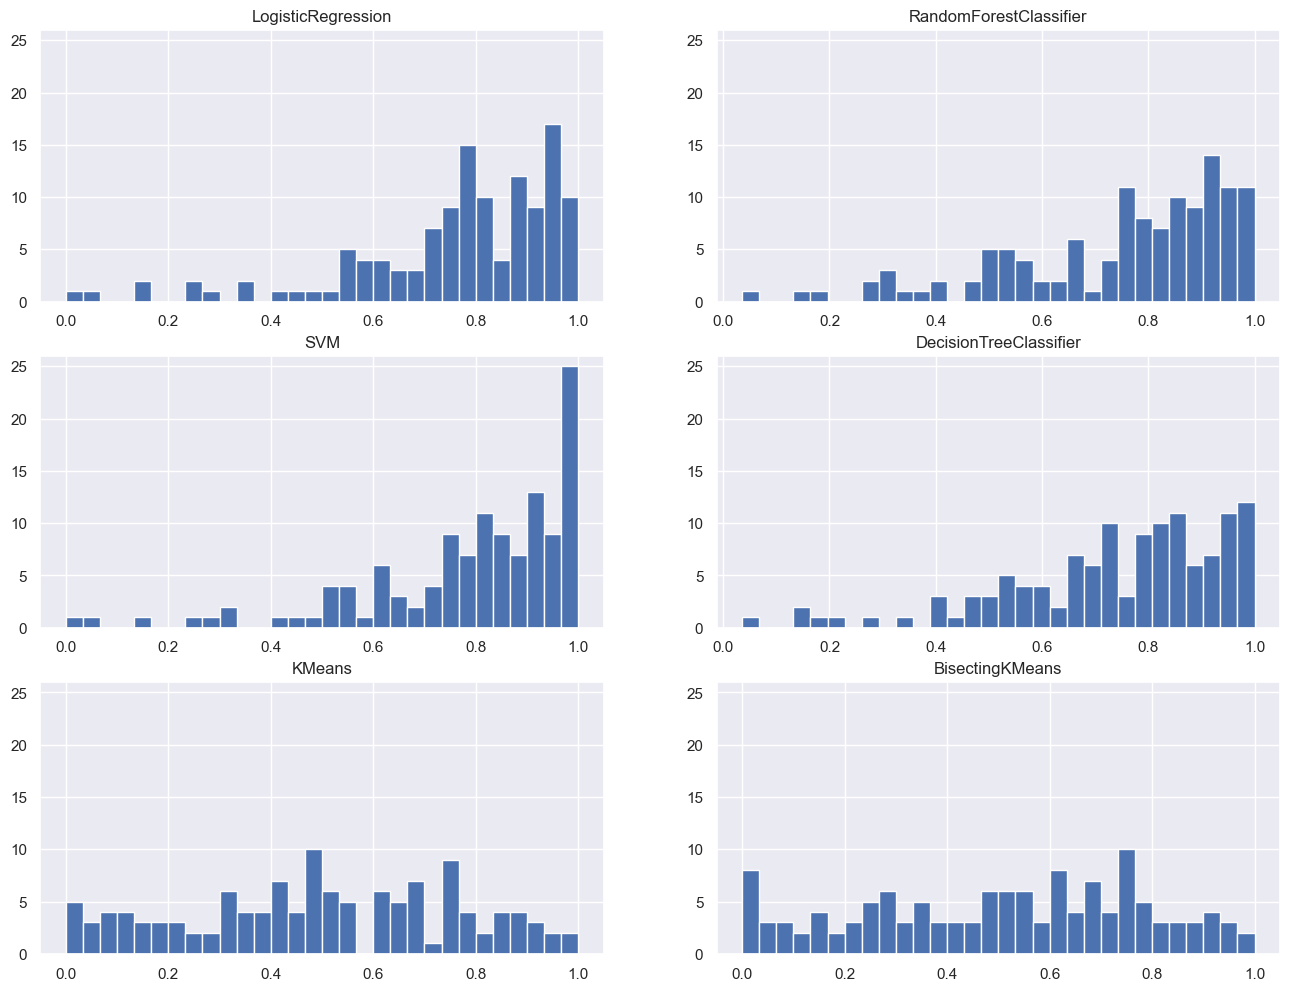

In [152]:
# Show the plot
# fig, axes = plt.subplots(3, 2, figsize=(30, 10))  # 1 row, 2 columns
plt.figure(figsize=(16,12))
for i,m in enumerate(model_result):
    plt.subplot(3,2,i+1)
    plt.hist(model_result[m], bins=30)  # Adjust the number of bins as needed
    plt.ylim(0,26)
    # # Add labels and title
    # plt.xlabel('Value')
    # plt.ylabel('')
    plt.title(m)

plt.show()
